In [65]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

number of jobs per job title

In [79]:
df_plot = df['job_title_short'].value_counts().to_frame()
df_plot



,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


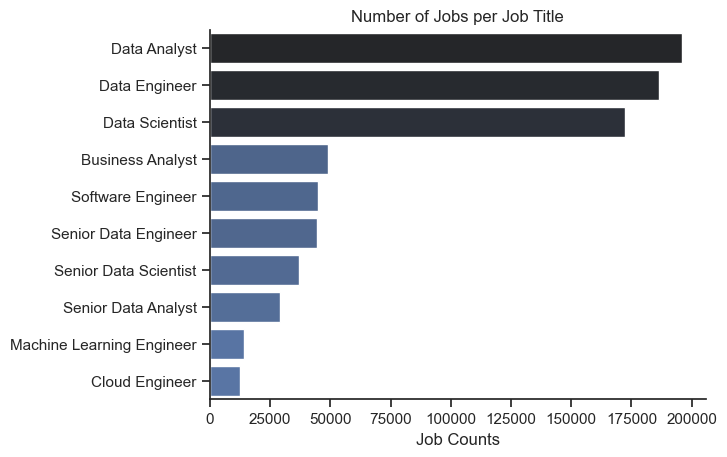

In [80]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
plt.title('Number of Jobs per Job Title')
plt.xlabel('Job Counts')
plt.ylabel('')
sns.despine()
plt.show()


number of jobs per company

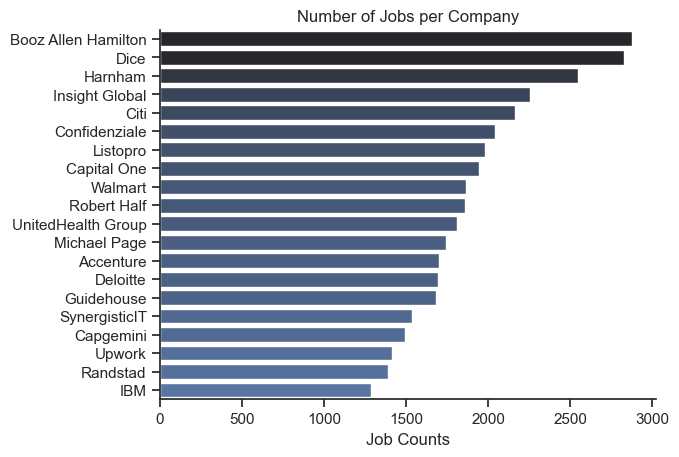

In [97]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.ylabel('')
plt.xlabel('Job Counts')
plt.title('Number of Jobs per Company')
sns.despine()
plt.show()





number of jobs per country 

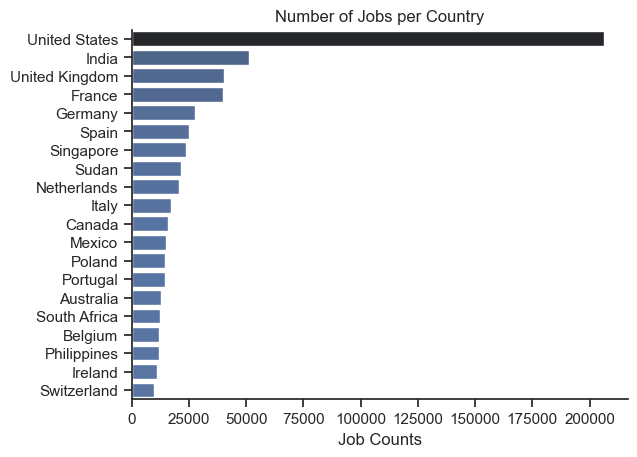

In [96]:
df_plot = df['job_country'].value_counts().to_frame().head(20)
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
plt.title('Number of jobs per country')
plt.ylabel('')
plt.xlabel('Job Counts')
plt.title('Number of Jobs per Country')
sns.despine()
plt.show()

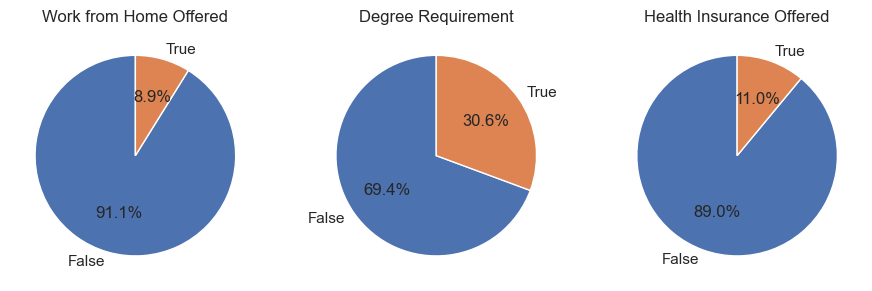

In [86]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

EDA for data analysts in India

In [88]:
df_ind = df[(df['job_country']=='India') & (df['job_title_short'] =='Data Analyst')]

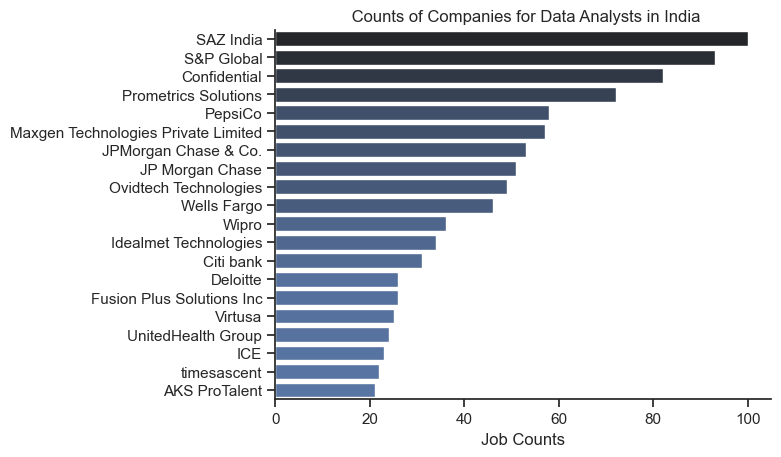

In [98]:
df_plot = df_ind['company_name'].value_counts().to_frame().head(20)
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.ylabel('')
plt.xlabel('Job Counts')
plt.title(' Counts of Companies for Data Analysts in India')
sns.despine()
plt.show()


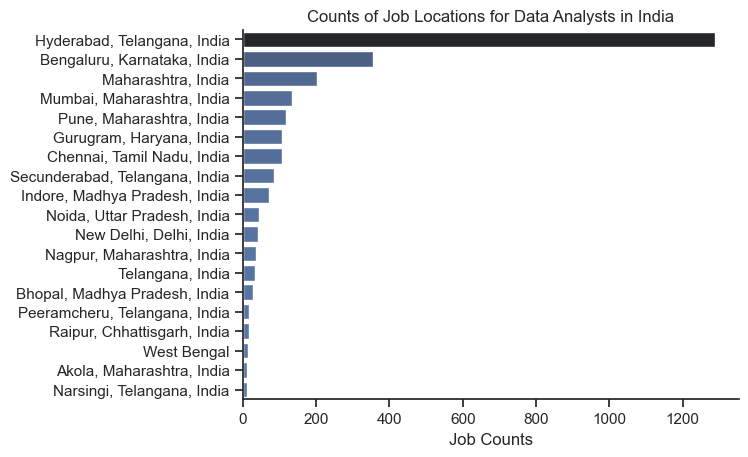

In [103]:
df_plot = df_ind['job_location'].value_counts().to_frame()[1:].head(20)
df_plot = df_plot.drop(index='Anywhere')   # remove that one entry
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.ylabel('')
plt.xlabel('Job Counts')
plt.title('Counts of Job Locations for Data Analysts in India')
sns.despine()
plt.show()


job opportunities

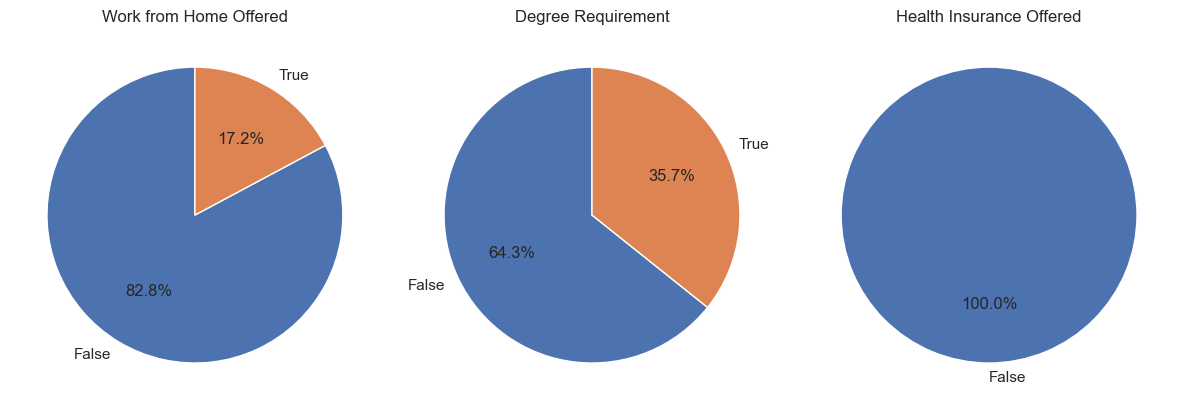

In [104]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    df_ind[column].value_counts().plot(
        kind='pie',
        labels=['False', 'True'],   # custom labels (optional)
        autopct='%1.1f%%',
        startangle=90,
        ylabel='',                  # hides the default ylabel
        ax=ax[i]                    # assign each pie to its subplot
    )
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.tight_layout()
plt.show()